<a href="https://colab.research.google.com/github/bernlkb/STQD6014-DataScience/blob/main/Week13_TimeSeries_20240114_WC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 13: Time Series**
Please refer to the textbook: "Python for Data Analysis" by Wes McKinney for details of this topic on **Chapter 11**

Anything that is recorded repeatedly at ***many points in time*** forms a time series

In [1]:
# Import NumPy, Pandas, and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **11.1 Date and Time Data Types and Tools**
#### The ***datetime, time, and calendar modules***

# ***Standard date accepted worldwide***:
# We have different date format:
    * 03/01/2024
    * O3 Jan 2024
    * 01/03/24
    *.....
# **But the internationally accepted is below**:
* YYYY-MM-DD
* e.g.: ***2024-01-14

***

In [2]:
# Load the necessary modules for time series
from datetime import datetime
from datetime import timedelta
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.frequencies import to_offset

In [5]:
# The time as of now
# BY default, this is in UTC format
now = datetime.now()
now

datetime.datetime(2024, 1, 14, 6, 29, 12, 344222)

In [6]:
# Extract year, month, day, hour, minute, second, and microsecond from now
now.year, now.month, now.day, now.hour, now.minute, now.second, now.microsecond

(2024, 1, 14, 6, 29, 12, 344222)

# **New term: Coordinated Universal Time -> UTC**
Malaysia time is 8 hrs ahead of UTC
* +8:00:00 UTC

Now: Malaysia time is 2.30pm

UTC: 6.30am (because need to minus 8hrs)

# ***Why UTC?***
So that everyone using the same time zone; whether you are in US, Malaysia, China, Japan, it doesn't matter if everyone is **referring to UTC**

#### ***timedelta*** represents the ***temporal difference*** between two date time objects

In [22]:
# timedelta() function -> the temporal difference between two datetime objects
delta = datetime(2024, 2, 10, 0, 0) - datetime(2024, 1, 14, 14, 37)

In [24]:
# Extract days and seconds
# The difference is 9 hrs 23 minit -> 9 hrs * 3600 + 23 * 60 = 33780 seconds
print(delta.days)
print(delta.seconds)

26
33780


In [25]:
# Adding days [most basic unit]
# datetime always refer to the smallest unit
start = datetime(2024, 1, 14)
start + timedelta(10)

datetime.datetime(2024, 1, 24, 0, 0)

In [27]:
# Substracting days - 24 days prior
start - 2 * timedelta(12)

datetime.datetime(2023, 12, 21, 0, 0)

# Data types in the ***datetime*** module



##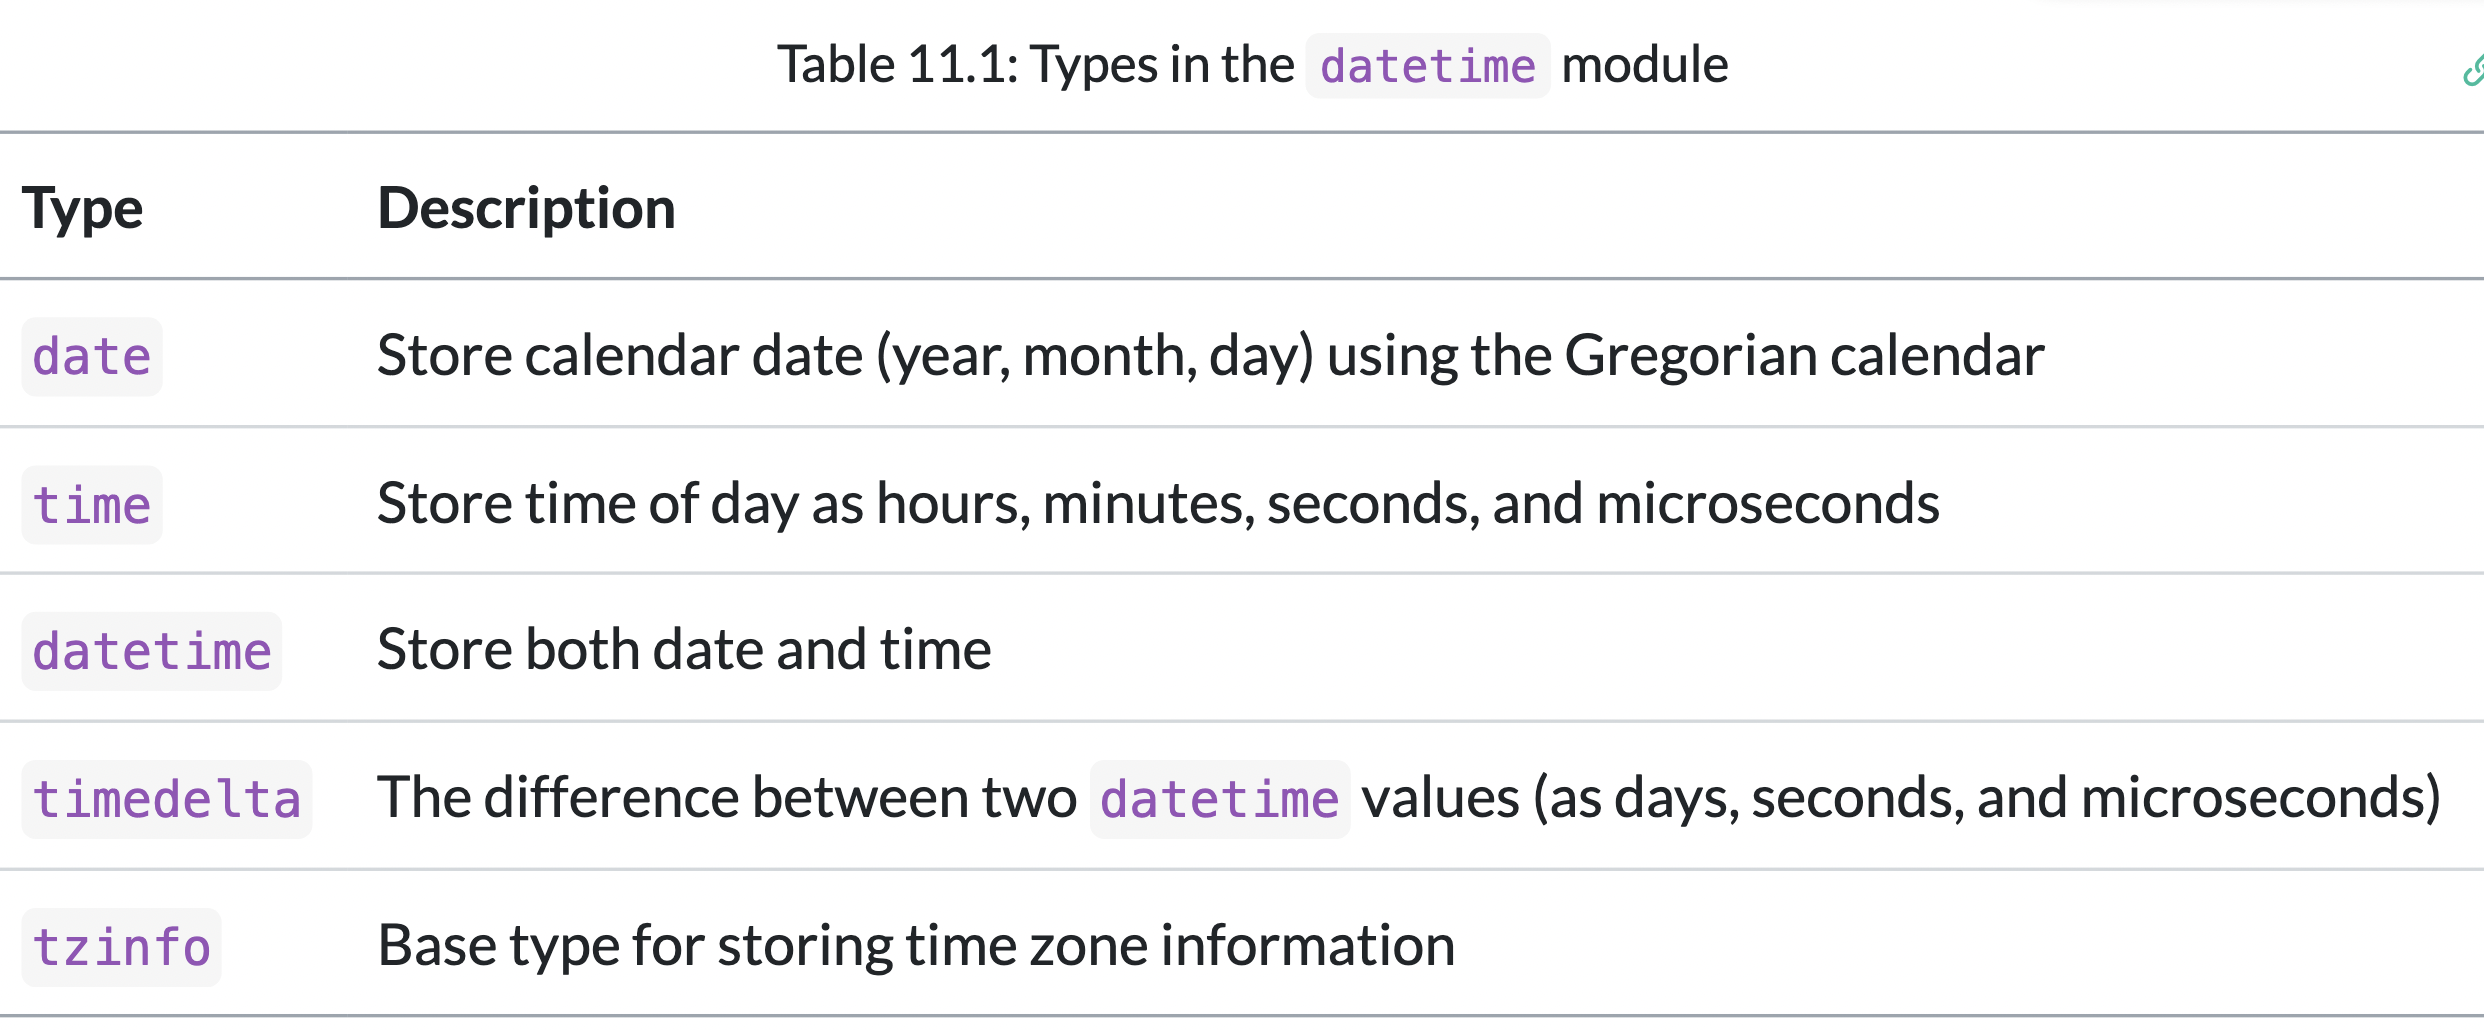



#### ***Converting Between String and Datetime***

In [28]:
# Timestamp
# Datetime object - convert numerical data type to datetime object
# datetime object -> date (yyyy-mm-dd, hr:min:sec)
stamp = datetime(2024, 1, 14)
stamp

datetime.datetime(2024, 1, 14, 0, 0)

In [33]:
# From datetime change to a string
# Using the strftime() -> The "f" here -> parse according to a specific "format"
stamp.strftime('%m/%d/%y') # US style

'01/14/24'

#### **datetime format specification (ISO C89 compatible)**

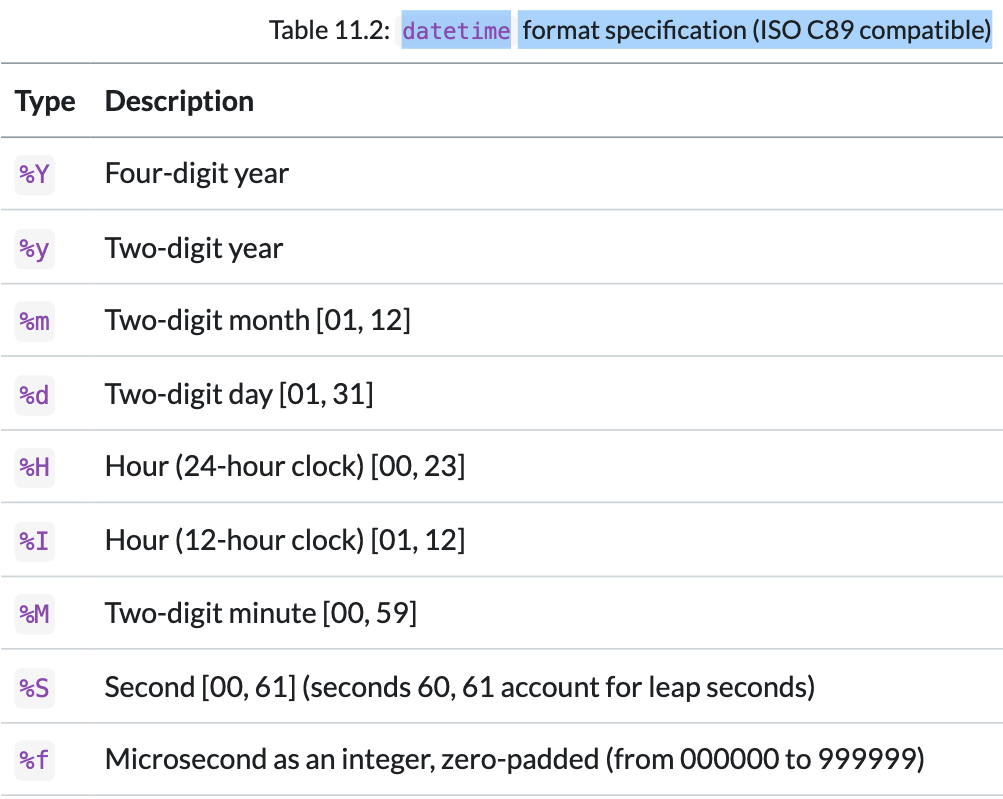

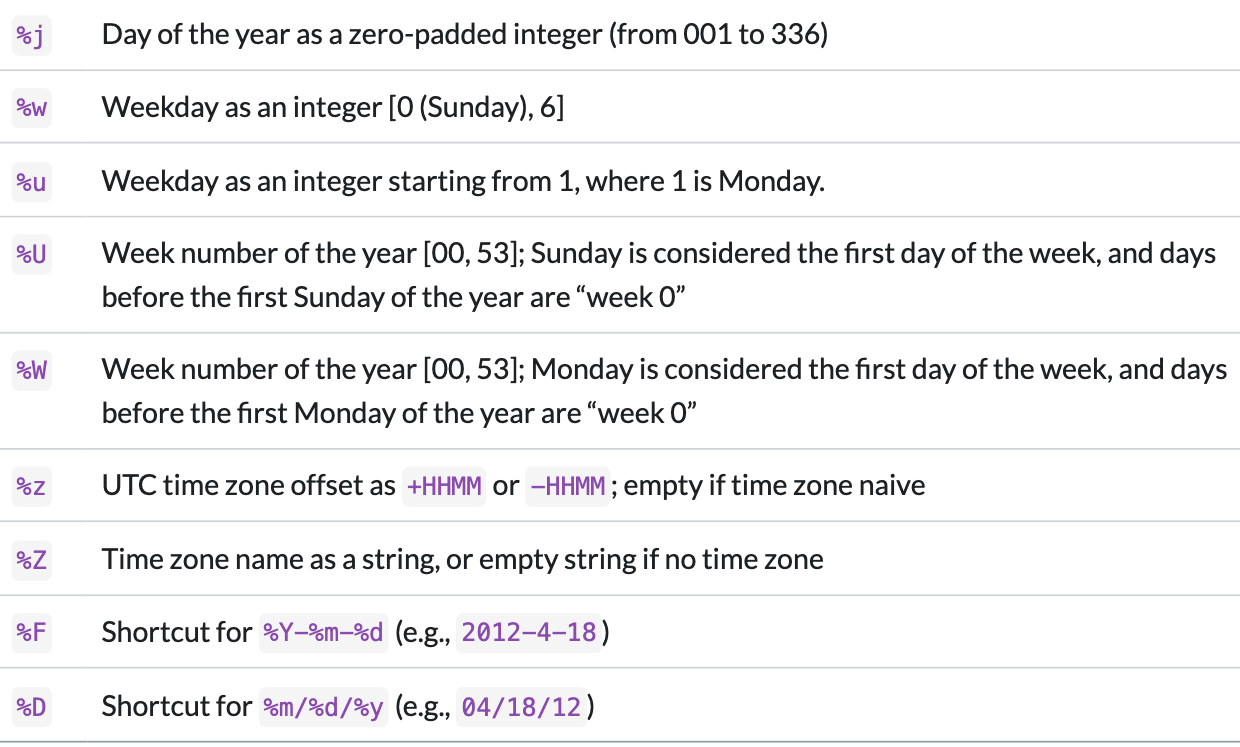

In [34]:
# Current Datetime as of now
stamp

datetime.datetime(2024, 1, 14, 0, 0)

In [35]:
# Change to year, month and day format
# Using the strftime() function
# Create different version
print(stamp.strftime('%Y-%m-%d'))
print(stamp.strftime('%y-%m-%d'))
print(stamp.strftime('%D'))
print(stamp.strftime('%F')) # %F -> this one is standard format

2024-01-14
24-01-14
01/14/24
2024-01-14


In [40]:
# Convert from string to datetime using strptime() function
# strptime -> from string to datetime -> parse
val = '2024/01@14'
print(datetime.strptime(val, '%Y/%m@%d'))

2024-01-14 00:00:00


In [41]:
# Given a list of dates in string format
date_string = ['1998-07-01', '2000-02-08']

# Convert to datetime object using for loop
[datetime.strptime(x, '%Y-%m-%d') for x in date_string]

[datetime.datetime(1998, 7, 1, 0, 0), datetime.datetime(2000, 2, 8, 0, 0)]

In [42]:
# Using pandas to deal with time series
date_string = ['1998-07-01 12:00:00', '2000-02-08 00:00:00']
pd.to_datetime(date_string)

DatetimeIndex(['1998-07-01 12:00:00', '2000-02-08 00:00:00'], dtype='datetime64[ns]', freq=None)

# **11.2 Time Series Basics**

#### **• basic kind of time series object in pandas is a Series indexed by timestamps**

In [43]:
# A timestamp example
rng = np.random.RandomState(12345)

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

# Create a time series ts
ts = pd.Series(rng.standard_normal(6), index = dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [44]:
# Accessing all timestamp index
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [45]:
# Accessing individual timestamp index
# negative indexing
ts.index[-2]

Timestamp('2011-01-10 00:00:00')

In [46]:
# Arithmetic operations
# skipping by two
# Sum based on same index
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [47]:
# Display ts content
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [48]:
# Display ts[::2] content
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

#### **Indexing, Selection, Subsetting**

In [49]:
# Display ts content
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [51]:
# Accessing individual index
ts.index[2]

Timestamp('2011-01-07 00:00:00')

In [52]:
# If i do this
ts[2]

-0.5194387150567381

In [53]:
# Indexing and selecting data
print(ts.index[2])
print(ts[2])

print('\n ------- \n')

# more proper way
ts[ts.index[2]]

2011-01-07 00:00:00
-0.5194387150567381

 ------- 



-0.5194387150567381

In [54]:
# Pass explicitly an argument as a string to extract value
ts['2011-01-12']

1.3934058329729904

In [55]:
# date range - range of date
# period - a time span [days, months, years, minutes, hours, seconds]
# Create a longer time series example
rng = np.random.RandomState(12345)
longer_ts = pd.Series(rng.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods = 1000))
longer_ts

2000-01-01   -0.204708
2000-01-02    0.478943
2000-01-03   -0.519439
2000-01-04   -0.555730
2000-01-05    1.965781
                ...   
2002-09-22    0.107657
2002-09-23   -0.139298
2002-09-24   -1.159926
2002-09-25    0.618965
2002-09-26    1.373890
Freq: D, Length: 1000, dtype: float64

In [56]:
# Accessing only the year 2002 data
longer_ts['2002']

2002-01-01    1.129120
2002-01-02    0.057874
2002-01-03   -0.433739
2002-01-04    0.092698
2002-01-05   -1.397820
                ...   
2002-09-22    0.107657
2002-09-23   -0.139298
2002-09-24   -1.159926
2002-09-25    0.618965
2002-09-26    1.373890
Freq: D, Length: 269, dtype: float64

In [57]:
# Accessing year 2001 data
longer_ts['2001']

2001-01-01   -1.610841
2001-01-02   -1.026621
2001-01-03    1.241573
2001-01-04   -0.156760
2001-01-05   -2.449096
                ...   
2001-12-27    1.578948
2001-12-28    0.000369
2001-12-29    0.900885
2001-12-30   -0.454869
2001-12-31   -0.864547
Freq: D, Length: 365, dtype: float64

In [58]:
# Accessing year 2000 data
longer_ts['2000']

2000-01-01   -0.204708
2000-01-02    0.478943
2000-01-03   -0.519439
2000-01-04   -0.555730
2000-01-05    1.965781
                ...   
2000-12-27    0.115699
2000-12-28    1.014042
2000-12-29   -1.135008
2000-12-30   -0.263371
2000-12-31    1.306425
Freq: D, Length: 366, dtype: float64

In [59]:
# Accessing the month
longer_ts['2001-06']

2001-06-01    0.545680
2001-06-02    0.235477
2001-06-03    0.111835
2001-06-04   -1.251504
2001-06-05   -2.949343
2001-06-06    0.634634
2001-06-07    0.124157
2001-06-08    1.297622
2001-06-09   -1.686933
2001-06-10    1.089539
2001-06-11    2.060882
2001-06-12   -0.241235
2001-06-13   -0.947872
2001-06-14    0.676294
2001-06-15   -0.653356
2001-06-16   -0.652295
2001-06-17    0.528828
2001-06-18    0.357793
2001-06-19    0.188649
2001-06-20    0.869417
2001-06-21   -0.050667
2001-06-22   -0.716365
2001-06-23   -0.103259
2001-06-24   -1.141037
2001-06-25   -0.500777
2001-06-26   -0.389301
2001-06-27   -0.473851
2001-06-28    0.128664
2001-06-29    0.153694
2001-06-30    0.444790
Freq: D, dtype: float64

In [61]:
# Previous time series example data
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [64]:
# format 1
# Slicing with datetime objects
ts[datetime(2011, 1, 7): ]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [66]:
# format 2
# Slicing with datetime objects
ts[datetime(2011, 1, 7): datetime(2011, 1, 11)]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [67]:
# Display original ts
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [68]:
# slice with timestamps not contained in a time series to perform a range query
ts['2011-01-06':'2011-01-11']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [69]:
# truncate
# when to end the date
ts.truncate(after = '2011-01-09')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [70]:
# Another example - DataFrame timestamp
# Refer to the calendar
rng = np.random.RandomState(12345)

# Dates
dates = pd.date_range('2000-01-01', periods = 100, freq = 'W-THU')

# Create a data frame
long_df = pd.DataFrame(rng.standard_normal((100, 4)), index = dates,
                       columns = ['Shanghai', 'Tokyo', 'Bangi', 'Singapore'])
long_df

,Shanghai,Tokyo,Bangi,Singapore
2000-01-06,-0.204708,0.478943,-0.519439,-0.555730
2000-01-13,1.965781,1.393406,0.092908,0.281746
2000-01-20,0.769023,1.246435,1.007189,-1.296221
2000-01-27,0.274992,0.228913,1.352917,0.886429
2000-02-03,-2.001637,-0.371843,1.669025,-0.438570
...,...,...,...,...
2001-11-01,0.564561,-0.190481,-0.916934,-0.975814
2001-11-08,2.212303,0.073931,1.818595,-1.581531
2001-11-15,-0.774363,0.552936,0.106061,3.927528
2001-11-22,-0.255126,0.854137,-0.364807,0.131102


In [71]:
# Indexing - using loc method
# Using the label - get the november 2001 data
long_df.loc['2001-11']

,Shanghai,Tokyo,Bangi,Singapore
2001-11-01,0.564561,-0.190481,-0.916934,-0.975814
2001-11-08,2.212303,0.073931,1.818595,-1.581531
2001-11-15,-0.774363,0.552936,0.106061,3.927528
2001-11-22,-0.255126,0.854137,-0.364807,0.131102
2001-11-29,-0.697614,1.335649,-0.151039,0.442938


#### **Time Series with Duplicate Indices**

In [72]:
# Duplicated indexes
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])

# Create a duplicated time series
dup_ts = pd.Series(np.arange(5), index = dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [73]:
# Check index uniqueness
dup_ts.index.is_unique

False

In [74]:
# Indexing / Slicing
dup_ts['2000-01-02']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [75]:
# Display dup_ts content
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [77]:
# grouby and get the mean
# groupby -> intermediate file -> we wanted to do aggregation
# level 1 is for multi-indexing dataset
grouped = dup_ts.groupby(level = 0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [78]:
# Count
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# **11.3 Date Ranges, Frequencies, and Shifting**

#### **Generating Date Ranges**

In [84]:
# Create a DateTimeIndex
index = pd.date_range('2012-04-01', '2012-07-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [85]:
# State number of periods: start
# freq='M' -> Last calendar day of month
pd.date_range(start = '2012-04', periods = 5, freq = 'M')

DatetimeIndex(['2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31',
               '2012-08-31'],
              dtype='datetime64[ns]', freq='M')

In [86]:
# State number of periods: end
pd.date_range(end = '2012-06', periods = 3, freq = 'M')

DatetimeIndex(['2012-03-31', '2012-04-30', '2012-05-31'], dtype='datetime64[ns]', freq='M')

# ***Base time series frquencies***

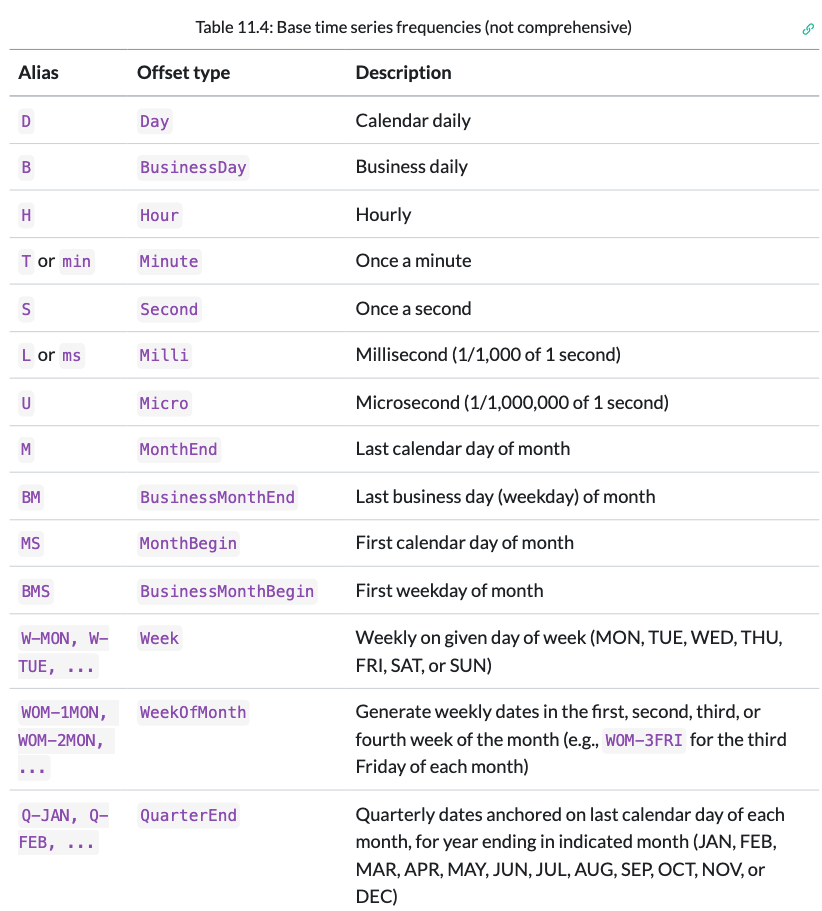

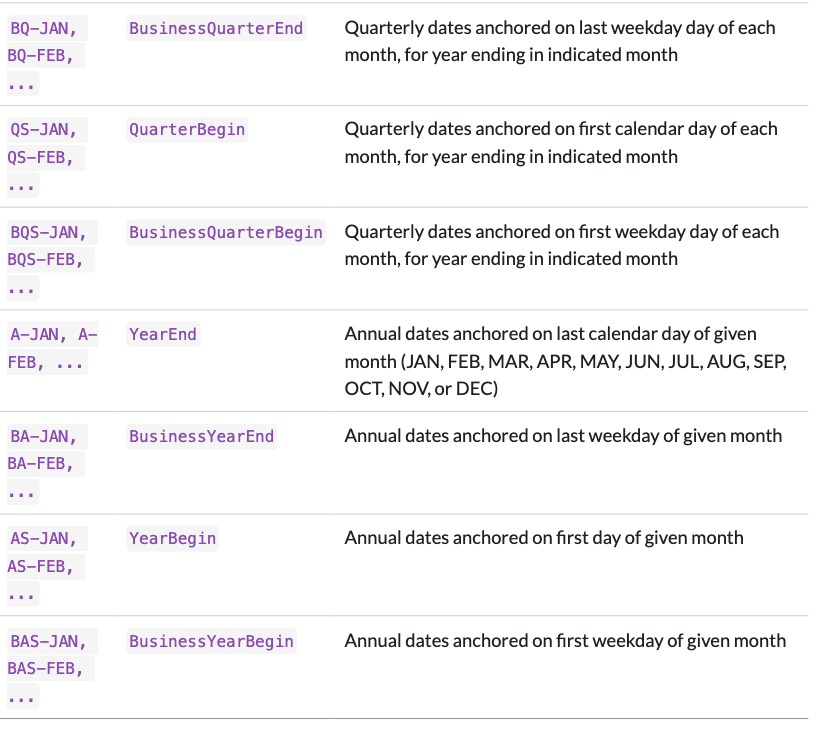

In [88]:
# "BM" frequency: Last business day (weekday) of month
# "business day" - monday to friday
pd.date_range('2024-1-14', '2024-03-01', freq = 'BM')

DatetimeIndex(['2024-01-31', '2024-02-29'], dtype='datetime64[ns]', freq='BM')

In [89]:
# pandas.date_range by default preserves the time (if any)
# of the start or end timestamp
# default freq is 'D'
pd.date_range('2024-01-14 15:52:27', periods = 5)

DatetimeIndex(['2024-01-14 15:52:27', '2024-01-15 15:52:27',
               '2024-01-16 15:52:27', '2024-01-17 15:52:27',
               '2024-01-18 15:52:27'],
              dtype='datetime64[ns]', freq='D')

In [91]:
# Normalized to midnight -> starting from midnight
# Default freq is freq='D'
pd.date_range('2024-01-14 15:53:28', periods = 3, normalize = True)

DatetimeIndex(['2024-01-14', '2024-01-15', '2024-01-16'], dtype='datetime64[ns]', freq='D')

#### **Frequencies and Date Offsets**

In [92]:
# Define an offset by passing an integer
Hour(4)

<4 * Hours>

In [93]:
# Putting an integer before the base frequency creates a multiple (multiply)
# In this case, freq="4H" -> 4 * Hour as in the previous example
pd.date_range('2024-01-14', '2024-01-15', freq = '4H')

DatetimeIndex(['2024-01-14 00:00:00', '2024-01-14 04:00:00',
               '2024-01-14 08:00:00', '2024-01-14 12:00:00',
               '2024-01-14 16:00:00', '2024-01-14 20:00:00',
               '2024-01-15 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [94]:
# Many offsets can be combined by addition
# delve down to the smallest unit -> minute
Hour(2) + Minute (30)

<150 * Minutes>

In [95]:
# Can also pass as frequency strings
pd.date_range('2024-01-14', periods = 5, freq = '1h38min')

DatetimeIndex(['2024-01-14 00:00:00', '2024-01-14 01:38:00',
               '2024-01-14 03:16:00', '2024-01-14 04:54:00',
               '2024-01-14 06:32:00'],
              dtype='datetime64[ns]', freq='98T')

#### **Week of month dates**

In [96]:
# “week of month”
# freq="WOM-3FRI" -> week of the month, 3rd Friday
monthly_dates = pd.date_range('2024-01-14', '2024-09-01',
                              freq = 'WOM-3FRI')
list(monthly_dates)

[Timestamp('2024-01-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2024-02-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2024-03-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2024-04-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2024-05-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2024-06-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2024-07-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2024-08-16 00:00:00', freq='WOM-3FRI')]

#### **Shifting (Leading and Lagging) Data**
• ***naive shifts leave the index unmodified***

• Shifting refers to ***moving data backward and forward through time***

* it is a simple operation where the data points in a time series are ***moved backward or forward in time***.
    * ***does not involve complex transformations or considerations***
    * ***does not modify the index or take into account any additional factors***

In [97]:
# Example timestamps
# freq="M" -> Last calendar day of month
rng = np.random.RandomState(12345)

# Create a time series data
ts = pd.Series(rng.standard_normal(4),
               index = pd.date_range('2024-01-14', periods = 4, freq = 'M'))
ts

2024-01-31   -0.204708
2024-02-29    0.478943
2024-03-31   -0.519439
2024-04-30   -0.555730
Freq: M, dtype: float64

# ***Forward Shift (Lag)***
If we use a positive integer as an argument, such as 2, it indicates a ***forward shift (or lag)***
    
* Each data point in the time series will be replaced by the value that occurred two periods before.

# ***Backward Shift (Lead)***
If we use a negative integer as an argument, such as -2, it indicates a ***backward shift (or lead)***

* Each data point in the time series will be replaced by the value that occurs two periods later.

In [98]:
# Original ts content
ts

2024-01-31   -0.204708
2024-02-29    0.478943
2024-03-31   -0.519439
2024-04-30   -0.555730
Freq: M, dtype: float64

In [99]:
# shifting the data forward; preserving the index
ts.shift(2)

2024-01-31         NaN
2024-02-29         NaN
2024-03-31   -0.204708
2024-04-30    0.478943
Freq: M, dtype: float64

In [100]:
# shifting backward; preserving the index
ts.shift(-2)

2024-01-31   -0.519439
2024-02-29   -0.555730
2024-03-31         NaN
2024-04-30         NaN
Freq: M, dtype: float64

In [101]:
# Original ts content
ts

2024-01-31   -0.204708
2024-02-29    0.478943
2024-03-31   -0.519439
2024-04-30   -0.555730
Freq: M, dtype: float64

In [102]:
# pass monthly freq; shifting 2 months forward
# Annually - 12 months [end]
# Quarterly - 3 months [end]
# freq="Q-JAN" -> Quarterly dates anchored on last calendar day of Jan, for year ending in indicated month
# In this case, Nov2023, Dec2023 & Jan2024 is one quarter
ts.shift(2, freq = 'Q-JAN')

2024-07-31   -0.204708
2024-07-31    0.478943
2024-07-31   -0.519439
2024-10-31   -0.555730
dtype: float64

In [103]:
# Original ts content
ts

2024-01-31   -0.204708
2024-02-29    0.478943
2024-03-31   -0.519439
2024-04-30   -0.555730
Freq: M, dtype: float64

In [104]:
# pass daily freq; shifting three days forward
ts.shift(3, freq = 'D')

2024-02-03   -0.204708
2024-03-03    0.478943
2024-04-03   -0.519439
2024-05-03   -0.555730
dtype: float64

In [105]:
# T - for minutes
ts.shift(1, freq = '90T')

2024-01-31 01:30:00   -0.204708
2024-02-29 01:30:00    0.478943
2024-03-31 01:30:00   -0.519439
2024-04-30 01:30:00   -0.555730
dtype: float64

#### **Shifting dates with offsets**

In [106]:
# Date time as of now - in UTC format
now = datetime.now()
now

datetime.datetime(2024, 1, 14, 8, 12, 45, 538597)

In [107]:
# now = datetime(2024, 1, 14)
now + 3 * Day()

Timestamp('2024-01-17 08:12:45.538597')

In [108]:
# adding an anchored offset like MonthEnd will “roll forward” a
# date to the next date according to the frequency rule
now + MonthEnd()

Timestamp('2024-01-31 08:12:45.538597')

In [109]:
# first month end is Jan 31
# second month end is Feb 29
now + MonthEnd(2)

Timestamp('2024-02-29 08:12:45.538597')

In [110]:
# Content of now
now

datetime.datetime(2024, 1, 14, 8, 12, 45, 538597)

In [111]:
# rollforward - end of the day of that month
# rollback - end of the day of the month before
offset = MonthEnd()

print(now)
print('\n ----- \n')
print(offset.rollforward(now))
print('\n ----- \n')
print(offset.rollback(now))

2024-01-14 08:12:45.538597

 ----- 

2024-01-31 08:12:45.538597

 ----- 

2023-12-31 08:12:45.538597


In [112]:
# Example time series
rng = np.random.RandomState(12345)

# Create a time series data
ts = pd.Series(rng.standard_normal(20),
               index = pd.date_range('2024-01-03', periods = 20, freq = '4D'))
ts

2024-01-03   -0.204708
2024-01-07    0.478943
2024-01-11   -0.519439
2024-01-15   -0.555730
2024-01-19    1.965781
2024-01-23    1.393406
2024-01-27    0.092908
2024-01-31    0.281746
2024-02-04    0.769023
2024-02-08    1.246435
2024-02-12    1.007189
2024-02-16   -1.296221
2024-02-20    0.274992
2024-02-24    0.228913
2024-02-28    1.352917
2024-03-03    0.886429
2024-03-07   -2.001637
2024-03-11   -0.371843
2024-03-15    1.669025
2024-03-19   -0.438570
Freq: 4D, dtype: float64

In [113]:
# Groupby and mean
ts.groupby(MonthEnd().rollforward).mean()

2024-01-31    0.366613
2024-02-29    0.511892
2024-03-31   -0.051319
dtype: float64

In [ ]:
# Manual calculation for March 2024 mean data
(0.886429-2.001637-0.371843+1.669025-0.438570) / 5

-0.05131919999999999

In [114]:
# Another way to get mean
ts.resample('M').mean()

2024-01-31    0.366613
2024-02-29    0.511892
2024-03-31   -0.051319
Freq: M, dtype: float64

# **11.4 Time Zone Handling**

*   UTC - coordinated universal time -> ***geography-independent international standard***.
*   Time zones are expressed as ***offsets from UTC***


*   for example, New York is four hours behind UTC during daylight saving time (DST) and five hours behind the rest of the year.



*   Spring forward [shorter] and fall backward [longer]
*   Spring -4 hrs; fall -5 hrs behind UTC

* DST -> shift an hour of daylight from the morning to the evening








In [116]:
# pytz -> python time zone
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [117]:
# Accessing the last five time zone
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

#### **Time Zone Localization and Conversion**

In [118]:
# By default, time series in pandas are time zone naive
rng = np.random.RandomState(12345)

dates = pd.date_range('2024-01-03', periods = 6)

# Create a time series data
ts = pd.Series(rng.standard_normal(len(dates)), index = dates)
ts

2024-01-03   -0.204708
2024-01-04    0.478943
2024-01-05   -0.519439
2024-01-06   -0.555730
2024-01-07    1.965781
2024-01-08    1.393406
Freq: D, dtype: float64

In [119]:
# The index’s time zone (tz) field is None
# By default, time series in pandas are time zone naive
print(ts.index.tz)

None


In [120]:
# Date ranges can be generated with a time zone set
# "Spring forward [shorter] and fall backward [longer]"
# adjusted forward by one hour on 2024-03-10 -> [UTC offset of -04:00]
# In the Eastern Time Zone, daylight saving time (DST) typically starts on the second Sunday in March
pd.date_range('2024-03-09 11:45', periods = 10, tz = 'America/New_York')

DatetimeIndex(['2024-03-09 11:45:00-05:00', '2024-03-10 11:45:00-04:00',
               '2024-03-11 11:45:00-04:00', '2024-03-12 11:45:00-04:00',
               '2024-03-13 11:45:00-04:00', '2024-03-14 11:45:00-04:00',
               '2024-03-15 11:45:00-04:00', '2024-03-16 11:45:00-04:00',
               '2024-03-17 11:45:00-04:00', '2024-03-18 11:45:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

# ***UTC offset is given in the format "+HH:MM" (hours and minutes)***

In [121]:
# Display original ts content
ts

2024-01-03   -0.204708
2024-01-04    0.478943
2024-01-05   -0.519439
2024-01-06   -0.555730
2024-01-07    1.965781
2024-01-08    1.393406
Freq: D, dtype: float64

In [122]:
# Conversion from naive to localized
# localizing to the "UTC" time zone
# "+00:00" represents the UTC offset associated with the timestamp
ts_utc = ts.tz_localize('UTC')
ts_utc

2024-01-03 00:00:00+00:00   -0.204708
2024-01-04 00:00:00+00:00    0.478943
2024-01-05 00:00:00+00:00   -0.519439
2024-01-06 00:00:00+00:00   -0.555730
2024-01-07 00:00:00+00:00    1.965781
2024-01-08 00:00:00+00:00    1.393406
Freq: D, dtype: float64

In [123]:
# Accessing the index
ts_utc.index

DatetimeIndex(['2024-01-03 00:00:00+00:00', '2024-01-04 00:00:00+00:00',
               '2024-01-05 00:00:00+00:00', '2024-01-06 00:00:00+00:00',
               '2024-01-07 00:00:00+00:00', '2024-01-08 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [124]:
# Convert to another time zone with tz_convert
# Convert from UTC to New York time
ts_utc.tz_convert('America/New_York')

2024-01-02 19:00:00-05:00   -0.204708
2024-01-03 19:00:00-05:00    0.478943
2024-01-04 19:00:00-05:00   -0.519439
2024-01-05 19:00:00-05:00   -0.555730
2024-01-06 19:00:00-05:00    1.965781
2024-01-07 19:00:00-05:00    1.393406
Freq: D, dtype: float64

In [128]:
# Daylight saving time (DST)
dates = pd.date_range('2024-03-09', periods = 6)

# Create a time series data
ts = pd.Series(rng.standard_normal(len(dates)), index = dates)
ts_utc = ts.tz_localize('UTC')
ts_utc

# Convert from UTC to New York time
ts_eastern = ts_utc.tz_convert('America/New_York')
ts_eastern

2024-03-08 19:00:00-05:00    1.669025
2024-03-09 19:00:00-05:00   -0.438570
2024-03-10 20:00:00-04:00   -0.539741
2024-03-11 20:00:00-04:00    0.476985
2024-03-12 20:00:00-04:00    3.248944
2024-03-13 20:00:00-04:00   -1.021228
Freq: D, dtype: float64

In [129]:
# Convert back to Coordinated Universal Time (UTC)
ts_eastern.tz_convert('UTC')

2024-03-09 00:00:00+00:00    1.669025
2024-03-10 00:00:00+00:00   -0.438570
2024-03-11 00:00:00+00:00   -0.539741
2024-03-12 00:00:00+00:00    0.476985
2024-03-13 00:00:00+00:00    3.248944
2024-03-14 00:00:00+00:00   -1.021228
Freq: D, dtype: float64

In [130]:
# Convert to other time zone
# Visit German
ts_eastern.tz_convert('Europe/Berlin')

2024-03-09 01:00:00+01:00    1.669025
2024-03-10 01:00:00+01:00   -0.438570
2024-03-11 01:00:00+01:00   -0.539741
2024-03-12 01:00:00+01:00    0.476985
2024-03-13 01:00:00+01:00    3.248944
2024-03-14 01:00:00+01:00   -1.021228
Freq: D, dtype: float64

In [131]:
# Display original ts index
ts.index

DatetimeIndex(['2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12',
               '2024-03-13', '2024-03-14'],
              dtype='datetime64[ns]', freq='D')

In [132]:
# Convert to other time zone
# Asia/Shanghai is 8 hours ahead of Coordinated Universal Time (UTC)
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2024-03-09 00:00:00+08:00', '2024-03-10 00:00:00+08:00',
               '2024-03-11 00:00:00+08:00', '2024-03-12 00:00:00+08:00',
               '2024-03-13 00:00:00+08:00', '2024-03-14 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [133]:
# Convert to other time zone
# "Asia/Kuala_Lumpur" is in the same time zone as "Asia/Shanghai"
ts.index.tz_localize('Asia/Kuala_Lumpur')

DatetimeIndex(['2024-03-09 00:00:00+08:00', '2024-03-10 00:00:00+08:00',
               '2024-03-11 00:00:00+08:00', '2024-03-12 00:00:00+08:00',
               '2024-03-13 00:00:00+08:00', '2024-03-14 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Kuala_Lumpur]', freq=None)

In [134]:
# Convert to other time zone
# "Asia/Bangkok" is 7 hours ahead of UTC
# Meaning KL & Shanghai is an hour ahead of Bangkok
ts.index.tz_localize('Asia/Bangkok')

DatetimeIndex(['2024-03-09 00:00:00+07:00', '2024-03-10 00:00:00+07:00',
               '2024-03-11 00:00:00+07:00', '2024-03-12 00:00:00+07:00',
               '2024-03-13 00:00:00+07:00', '2024-03-14 00:00:00+07:00'],
              dtype='datetime64[ns, Asia/Bangkok]', freq=None)

In [135]:
# Convert to other time zone
# "Asia/Tokyo" is 9 hours ahead of UTC
# One hour ahead of KL & Shanghai
ts.index.tz_localize('Asia/Tokyo')

DatetimeIndex(['2024-03-09 00:00:00+09:00', '2024-03-10 00:00:00+09:00',
               '2024-03-11 00:00:00+09:00', '2024-03-12 00:00:00+09:00',
               '2024-03-13 00:00:00+09:00', '2024-03-14 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Tokyo]', freq=None)

#### **Operations with Time Zone-Aware Timestamp Objects**
individual Timestamp objects similarly can be localized from naive to time zone-aware and converted from one time zone to another

In [139]:
# time stamp
# time zone naive
stamp = pd.Timestamp('2024-03-10 04:00')
stamp

Timestamp('2024-03-10 04:00:00')

In [140]:
# convert to UTC
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2024-03-10 04:00:00+0000', tz='UTC')

In [141]:
# Five hours behind UTC
stamp_utc.tz_convert('America/New_York')

Timestamp('2024-03-09 23:00:00-0500', tz='America/New_York')

In [143]:
# pass a time zone argument when creating the Timestamp
# moscow
stamp_moscow = pd.Timestamp('2024-01-14 04:00', tz = 'Europe/Moscow')
stamp_moscow

Timestamp('2024-01-14 04:00:00+0300', tz='Europe/Moscow')

In [144]:
# Time zone difference between Kyiv and Moscow
# Moscos is an hour ahead of Ukraine
print('Ukraine: ' + str(pd.Timestamp("2011-03-12 04:00", tz="Europe/Kyiv")))
print('Moscow: ' + str(pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")))

Ukraine: 2011-03-12 04:00:00+02:00
Moscow: 2011-03-12 04:00:00+03:00


#### **Operations Between Different Time Zones**
If two time series with different time zones are combined, the result will be UTC.

In [145]:
# Example
# "B" -> Business daily
dates = pd.date_range('2024-01-14 09:30', periods = 10, freq = 'B')
dates

DatetimeIndex(['2024-01-15 09:30:00', '2024-01-16 09:30:00',
               '2024-01-17 09:30:00', '2024-01-18 09:30:00',
               '2024-01-19 09:30:00', '2024-01-22 09:30:00',
               '2024-01-23 09:30:00', '2024-01-24 09:30:00',
               '2024-01-25 09:30:00', '2024-01-26 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [148]:
# time zone naive
rng = np.random.RandomState(12345)

ts = pd.Series(rng.standard_normal(len(dates)), index = dates)
ts

2024-01-15 09:30:00   -0.204708
2024-01-16 09:30:00    0.478943
2024-01-17 09:30:00   -0.519439
2024-01-18 09:30:00   -0.555730
2024-01-19 09:30:00    1.965781
2024-01-22 09:30:00    1.393406
2024-01-23 09:30:00    0.092908
2024-01-24 09:30:00    0.281746
2024-01-25 09:30:00    0.769023
2024-01-26 09:30:00    1.246435
Freq: B, dtype: float64

In [149]:
# time stamp 1 -> 'Europe/London'
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2024-01-15 09:30:00+00:00   -0.204708
2024-01-16 09:30:00+00:00    0.478943
2024-01-17 09:30:00+00:00   -0.519439
2024-01-18 09:30:00+00:00   -0.555730
2024-01-19 09:30:00+00:00    1.965781
2024-01-22 09:30:00+00:00    1.393406
2024-01-23 09:30:00+00:00    0.092908
dtype: float64

In [150]:
# time stamp 2
# Moscow is 3 hrs ahead of london
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2024-01-17 12:30:00+03:00   -0.519439
2024-01-18 12:30:00+03:00   -0.555730
2024-01-19 12:30:00+03:00    1.965781
2024-01-22 12:30:00+03:00    1.393406
2024-01-23 12:30:00+03:00    0.092908
dtype: float64

In [151]:
# Display ts1 and ts2
print(ts1)
print(ts2)

2024-01-15 09:30:00+00:00   -0.204708
2024-01-16 09:30:00+00:00    0.478943
2024-01-17 09:30:00+00:00   -0.519439
2024-01-18 09:30:00+00:00   -0.555730
2024-01-19 09:30:00+00:00    1.965781
2024-01-22 09:30:00+00:00    1.393406
2024-01-23 09:30:00+00:00    0.092908
dtype: float64
2024-01-17 12:30:00+03:00   -0.519439
2024-01-18 12:30:00+03:00   -0.555730
2024-01-19 12:30:00+03:00    1.965781
2024-01-22 12:30:00+03:00    1.393406
2024-01-23 12:30:00+03:00    0.092908
dtype: float64


In [152]:
# Arithmetic summation
ts1 + ts2

2024-01-15 09:30:00+00:00         NaN
2024-01-16 09:30:00+00:00         NaN
2024-01-17 09:30:00+00:00   -1.038877
2024-01-18 09:30:00+00:00   -1.111461
2024-01-19 09:30:00+00:00    3.931561
2024-01-22 09:30:00+00:00    2.786812
2024-01-23 09:30:00+00:00    0.185816
dtype: float64

# **11.5 Periods and Period Arithmetic**
Periods represent time spans, like days, months, quarters, or years.

In [154]:
# represents the full time span from January 1, 2011,
# to December 31, 2011, inclusive
# freq="A-DEC" -> Annual dates anchored on last calendar day of December
p = pd.Period('2024', freq = 'A-OCT')
p

Period('2024', 'A-OCT')

In [155]:
# Plus 5 years
p + 5

Period('2029', 'A-OCT')

In [156]:
# Minus 2 years
p - 2

Period('2022', 'A-OCT')

In [157]:
# If two periods have the same frequency, their difference is the
# number of units between them as a date offset
pd.Period('2026', freq = 'A-OCT') - p

<2 * YearEnds: month=10>

In [158]:
# Regular ranges of periods
periods = pd.period_range('2024-01-01', '2024-06-30', freq = "M")
periods

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06'], dtype='period[M]')

In [159]:
# PeriodIndex class stores a sequence of periods
# can serve as an axis index in any pandas data structure
rng = np.random.RandomState(12345)
pd.Series(rng.standard_normal(6), index = periods)

2024-01   -0.204708
2024-02    0.478943
2024-03   -0.519439
2024-04   -0.555730
2024-05    1.965781
2024-06    1.393406
Freq: M, dtype: float64

#### **Period Frequency Conversion**
using ***asfreq()*** function to convert to another frequency

In [160]:
# Annual period
# freq="A-DEC" -> end of the month is Dec, annually
p = pd.Period('2024', freq = 'A-APR')
p

Period('2024', 'A-APR')

In [161]:
# Convert into a monthly period
p.asfreq('M', how = 'start')

Period('2023-05', 'M')

In [162]:
# Convert into a monthly period
p.asfreq('M', how = 'end')

Period('2024-04', 'M')

In [163]:
# by default, the argument for how is "end"
p.asfreq('M')

Period('2024-04', 'M')

In [164]:
# freq="A-JUN" -> fiscal year ends in Jun
# annually we have 12 months
p = pd.Period('2024', freq = 'A-JUN')

In [165]:
# Example 1
p.asfreq('M', how = 'start')

Period('2023-07', 'M')

In [167]:
# Example 2
p.asfreq('M', how = 'end')

Period('2024-06', 'M')

#### **Quarterly Period Frequencies**

In [168]:
# Example
# quarter ends in Feb [i.e. we have Dec23, Jan24, & Feb24] as 4th quarter
p = pd.Period('2024Q4', freq = 'Q-FEB')
p

Period('2024Q4', 'Q-FEB')

In [169]:
# Example 1
p.asfreq('D', how = 'start')

Period('2023-12-01', 'D')

In [170]:
# how="end"
p.asfreq('D', how = 'end')

Period('2024-02-29', 'D')

In [171]:
# Display p content
p

Period('2024Q4', 'Q-FEB')

In [172]:
# period arithmetic
# T is referring to minute
p4pm = (p.asfreq('B', how = 'end') - 1).asfreq('T', how = 'start') + 16 * 60
p4pm

Period('2024-02-28 16:00', 'T')

In [173]:
# Delve down the coding manually
(p.asfreq('B', how = 'end') - 1)

Period('2024-02-28', 'B')

In [174]:
# Convert to timestamp
p4pm.to_timestamp()

Timestamp('2024-02-28 16:00:00')

#### **Converting Timestamps to Periods (and Back)**

In [175]:
# Example
dates = pd.date_range('2024-01-14', periods = 3, freq = 'M')
dates

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31'], dtype='datetime64[ns]', freq='M')

In [176]:
# Create a time series data
rng = np.random.RandomState(12345)
ts = pd.Series(rng.standard_normal(3), index = dates)
ts

2024-01-31   -0.204708
2024-02-29    0.478943
2024-03-31   -0.519439
Freq: M, dtype: float64

In [178]:
# Convert to periods
# smallest unit -> Month
pts = ts.to_period()
pts

2024-01   -0.204708
2024-02    0.478943
2024-03   -0.519439
Freq: M, dtype: float64

In [181]:
# Allow duplicate periods
rng = np.random.RandomState(12345)
dates = pd.date_range('2024-01-29', periods = 6)
ts2 = pd.Series(rng.standard_normal(6), index = dates)
ts2

2024-01-29   -0.204708
2024-01-30    0.478943
2024-01-31   -0.519439
2024-02-01   -0.555730
2024-02-02    1.965781
2024-02-03    1.393406
Freq: D, dtype: float64

In [182]:
# Convert to month periods
ts2.to_period('M')

2024-01   -0.204708
2024-01    0.478943
2024-01   -0.519439
2024-02   -0.555730
2024-02    1.965781
2024-02    1.393406
Freq: M, dtype: float64

In [183]:
# Convert back to timestamps
pts = ts2.to_period()
pts

2024-01-29   -0.204708
2024-01-30    0.478943
2024-01-31   -0.519439
2024-02-01   -0.555730
2024-02-02    1.965781
2024-02-03    1.393406
Freq: D, dtype: float64

In [184]:
# Convert from Series to timestamp
# Timestamp represents a specific point in time with nanosecond precision
pts.to_timestamp(how = 'end')

2024-01-29 23:59:59.999999999   -0.204708
2024-01-30 23:59:59.999999999    0.478943
2024-01-31 23:59:59.999999999   -0.519439
2024-02-01 23:59:59.999999999   -0.555730
2024-02-02 23:59:59.999999999    1.965781
2024-02-03 23:59:59.999999999    1.393406
Freq: D, dtype: float64

#### **Creating a PeriodIndex from Arrays**

In [186]:
# Example data - macrodata.csv
# link: https://bit.ly/3X2jfu8
# Macro economy data
data = pd.read_csv("https://bit.ly/3X2jfu8")
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [187]:
# combine year and quarter to form an index for the DataFrame
index = pd.PeriodIndex(year = data['year'], quarter = data['quarter'],
                       freq = 'Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [188]:
# Display data content
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [189]:
# Getting quarterly data for cpi
data.index = index
data['cpi']

1959Q1     28.980
1959Q2     29.150
1959Q3     29.350
1959Q4     29.370
1960Q1     29.540
           ...   
2008Q3    216.889
2008Q4    212.174
2009Q1    212.671
2009Q2    214.469
2009Q3    216.385
Freq: Q-DEC, Name: cpi, Length: 203, dtype: float64

# **11.6 Resampling and Frequency Conversion**
Resampling refers to the process of converting a time series from one frequency to another

In [190]:
# Example
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01   -0.101676
2000-01-02   -0.488124
2000-01-03   -0.464396
2000-01-04   -0.600066
2000-01-05   -0.249795
                ...   
2000-04-05   -0.030693
2000-04-06   -0.244344
2000-04-07   -2.008853
2000-04-08    0.067648
2000-04-09    0.382779
Freq: D, Length: 100, dtype: float64

In [191]:
# Monthly mean
ts.resample('M').mean()

2000-01-31    0.160378
2000-02-29    0.047111
2000-03-31    0.008499
2000-04-30   -0.396887
Freq: M, dtype: float64

In [192]:
# Monthly mean: Alternative method
ts.resample('M', kind = 'period').mean()

2000-01    0.160378
2000-02    0.047111
2000-03    0.008499
2000-04   -0.396887
Freq: M, dtype: float64

#### **Downsampling**
aggregating data to a regular, lower frequency

In [193]:
# one-minute frequency data example
# T referring to minutes
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [194]:
# sum of 5 minutes
# by default the left bin edge is inclusive -> "[ )"
# closed='left'
# label='left'
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [195]:
# Display ts content
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [197]:
# the right bin edge is inclusive -> "( ]"
# closed='right'
# label='left'
# index represents the end time of each interval
ts.resample('5min', closed = 'right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [ ]:
# Display ts content
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [198]:
# the right bin edge is inclusive -> "( ]"
# label right
ts.resample('5min', closed = 'right', label = 'right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [ ]:
# Display ts content
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [ ]:
# the right bin edge is inclusive -> "( ]"
# label left


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [ ]:
# offset data by 1 seconds


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### **Open-high-low-close (OHLC) resampling**
Stock price

In [ ]:
# Display dates content
dates

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [ ]:
# Example data
# permutation -> rearranging or shuffling the elements of the sequence in a random order.
rng = np.random.RandomState(12345)
ts = pd.Series(rng.permutation(np.arange(len(dates))), index=dates)
ts

2000-01-01 00:00:00     8
2000-01-01 00:01:00     0
2000-01-01 00:02:00     3
2000-01-01 00:03:00     7
2000-01-01 00:04:00    11
2000-01-01 00:05:00    10
2000-01-01 00:06:00     6
2000-01-01 00:07:00     9
2000-01-01 00:08:00     4
2000-01-01 00:09:00     1
2000-01-01 00:10:00     5
2000-01-01 00:11:00     2
Freq: T, dtype: int64

In [ ]:
# by default the left bin edge is inclusive -> "[ )"


,open,high,low,close
2000-01-01 00:00:00,8,11,0,11
2000-01-01 00:05:00,10,10,1,1
2000-01-01 00:10:00,5,5,2,2


#### **Upsampling and Interpolation**
converting from a lower frequency to a higher frequency

In [ ]:
# Example dataframe
rng = np.random.RandomState(12345)
frame = pd.DataFrame(rng.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-12,1.965781,1.393406,0.092908,0.281746


In [ ]:
# Upsampling - convert to a higher frequency


,Colorado,Texas,New York,Ohio
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.965781,1.393406,0.092908,0.281746


In [ ]:
# fill forward


,Colorado,Texas,New York,Ohio
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-06,-0.204708,0.478943,-0.519439,-0.555730
2000-01-07,-0.204708,0.478943,-0.519439,-0.555730
2000-01-08,-0.204708,0.478943,-0.519439,-0.555730
2000-01-09,-0.204708,0.478943,-0.519439,-0.555730
2000-01-10,-0.204708,0.478943,-0.519439,-0.555730
2000-01-11,-0.204708,0.478943,-0.519439,-0.555730
2000-01-12,1.965781,1.393406,0.092908,0.281746


In [ ]:
# fill certain number


,Colorado,Texas,New York,Ohio
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-06,-0.204708,0.478943,-0.519439,-0.555730
2000-01-07,-0.204708,0.478943,-0.519439,-0.555730
2000-01-08,-0.204708,0.478943,-0.519439,-0.555730
2000-01-09,-0.204708,0.478943,-0.519439,-0.555730
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.965781,1.393406,0.092908,0.281746


In [ ]:
# "W-THU" -> Weekly thursday


,Colorado,Texas,New York,Ohio
2000-01-06,-0.204708,0.478943,-0.519439,-0.555730
2000-01-13,1.965781,1.393406,0.092908,0.281746


#### **Resampling with Periods**
A Period represents ***a span of time*** (e.g., a day, a month, a quarter, etc).

In [ ]:
# Example dataframe
rng = np.random.RandomState(12345)
frame = pd.DataFrame(rng.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-0.204708,0.478943,-0.519439,-0.555730
2000-02,1.965781,1.393406,0.092908,0.281746
2000-03,0.769023,1.246435,1.007189,-1.296221
2000-04,0.274992,0.228913,1.352917,0.886429
2000-05,-2.001637,-0.371843,1.669025,-0.438570


In [ ]:
# Resample to annully, year ending in december


,Colorado,Texas,New York,Ohio
2000,-0.634588,0.272220,0.279361,-0.273546
2001,0.062526,0.295386,0.096807,0.173018


In [ ]:
# Q-DEC: Quarterly, year ending in December


,Colorado,Texas,New York,Ohio
2000Q1,-0.634588,0.272220,0.279361,-0.273546
2000Q2,-0.634588,0.272220,0.279361,-0.273546
2000Q3,-0.634588,0.272220,0.279361,-0.273546
2000Q4,-0.634588,0.272220,0.279361,-0.273546
2001Q1,0.062526,0.295386,0.096807,0.173018
2001Q2,0.062526,0.295386,0.096807,0.173018
2001Q3,0.062526,0.295386,0.096807,0.173018
2001Q4,0.062526,0.295386,0.096807,0.173018


In [ ]:
# Display annual_frame content
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.634588,0.272220,0.279361,-0.273546
2001,0.062526,0.295386,0.096807,0.173018


In [ ]:
# convention="end"


,Colorado,Texas,New York,Ohio
2000Q4,-0.634588,0.272220,0.279361,-0.273546
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.062526,0.295386,0.096807,0.173018


In [ ]:
# Display annual_frame content
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.634588,0.272220,0.279361,-0.273546
2001,0.062526,0.295386,0.096807,0.173018


In [ ]:
# Each year got 4 quarters
# Confusing!!!
# Q-DEC: Quarterly, end of March
# 2000Q4 -> Jan - Mar
# 2001Q1 -> Apr ->June
# 2001Q2 -> Jul - Sep
# 2001Q3 -> Oct - Dec
# 2001Q4 -> Jan - Mar


,Colorado,Texas,New York,Ohio
2000Q4,-0.634588,0.272220,0.279361,-0.273546
2001Q1,-0.634588,0.272220,0.279361,-0.273546
2001Q2,-0.634588,0.272220,0.279361,-0.273546
2001Q3,-0.634588,0.272220,0.279361,-0.273546
2001Q4,0.062526,0.295386,0.096807,0.173018
2002Q1,0.062526,0.295386,0.096807,0.173018
2002Q2,0.062526,0.295386,0.096807,0.173018
2002Q3,0.062526,0.295386,0.096807,0.173018


#### **Grouped Time Resampling**
* ***Using the groupby function***

In [ ]:
# Example
N=15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [ ]:
# index by "time" and then resample


,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [ ]:
# Display times content
times

DatetimeIndex(['2017-05-20 00:00:00', '2017-05-20 00:01:00',
               '2017-05-20 00:02:00', '2017-05-20 00:03:00',
               '2017-05-20 00:04:00', '2017-05-20 00:05:00',
               '2017-05-20 00:06:00', '2017-05-20 00:07:00',
               '2017-05-20 00:08:00', '2017-05-20 00:09:00',
               '2017-05-20 00:10:00', '2017-05-20 00:11:00',
               '2017-05-20 00:12:00', '2017-05-20 00:13:00',
               '2017-05-20 00:14:00'],
              dtype='datetime64[ns]', freq='T')

In [ ]:
# Example 2
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0
7,2017-05-20 00:02:00,b,7.0
8,2017-05-20 00:02:00,c,8.0
9,2017-05-20 00:03:00,a,9.0


In [ ]:
# pandas.Grouper object


TimeGrouper(freq=<5 * Minutes>, axis=0, sort=True, dropna=True, closed='left', label='left', how='mean', convention='e', origin='start_day')

In [ ]:
# level = 0 is key
# level = 1 is time
# dataset with multi-indexing


value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [ ]:
# reset_index - move the grouped index levels back to columns
# and restore the default integer index.


,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


1. how to combine year and quarter
2. change of frequency
3. count
4. seaborn plot - it will help super lot


# **11.7 Moving Window Functions**

In [ ]:
# load data - stock_ps.csv
# link: https://bit.ly/3k6mDpm
close_px_all = pd.read_csv("https://bit.ly/3k6mDpm",
                           parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [ ]:
# Resample the data based on Business Day


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


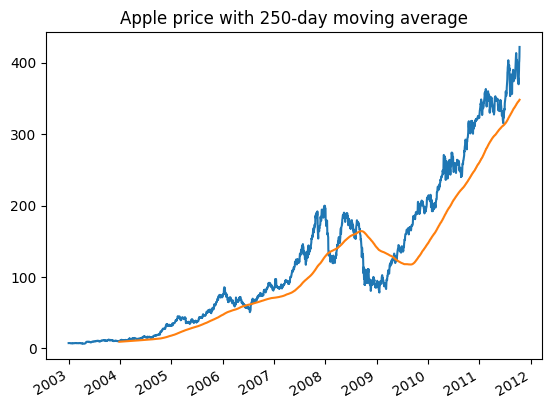

In [ ]:
# Rolling operator
# For the first day, it calculates the average of the closing prices for the first 250 days
# For the second day, it calculates the average of the closing prices from day 2 to day 251


In [ ]:
# Another example
# pct_change() -> calculates the percentage change between the current and previous elements in the series
# rolling standard deviation calculation -> start producing results only when there are at least 10 non-null data points within each rolling window of 250 periods.


2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
2003-01-21    0.013181
2003-01-22    0.012713
2003-01-23    0.014114
2003-01-24    0.014929
2003-01-27    0.016163
2003-01-28    0.017672
2003-01-29    0.018161
2003-01-30    0.020128
Name: AAPL, dtype: float64

<Figure size 640x480 with 0 Axes>

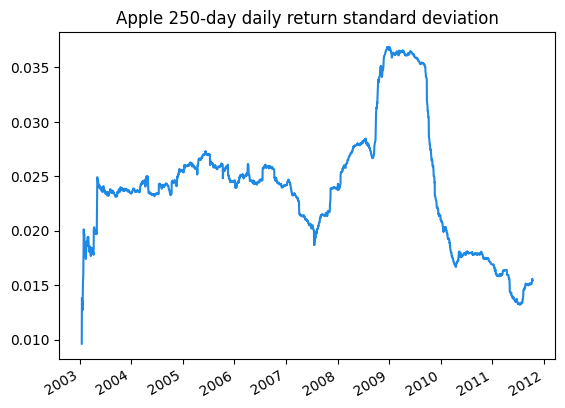

In [ ]:
# Plot the line plot
# Use the link to get more hexa color guide: https://www.colorhexa.com/


In [ ]:
# expanding() function -> starts the time window from the same point as the rolling window
# and increases the size of the window until it encompasses the whole series.


2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.011723
2003-01-21    0.012209
2003-01-22    0.012335
2003-01-23    0.012691
2003-01-24    0.013064
2003-01-27    0.013507
2003-01-28    0.014027
2003-01-29    0.014487
2003-01-30    0.015051
Name: AAPL, dtype: float64

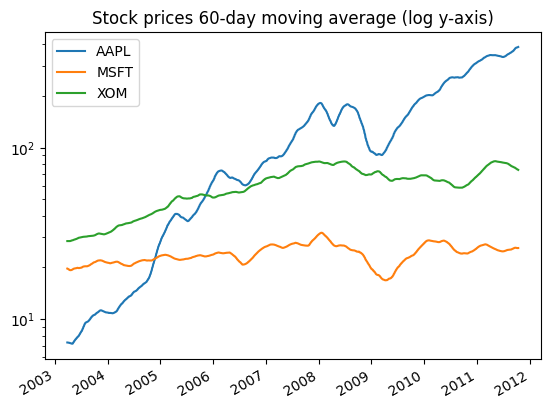

In [ ]:
# Log tansform y-axis


#### **Exponentially Weighted Functions**
exponentially weighted statistic ***places more weight on more recent observations***

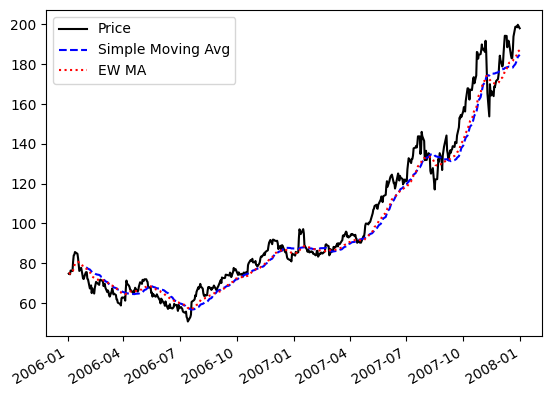

In [ ]:
# Apple’s stock price with an exponentially weighted (EW) moving average
# Extract Apple's stock price from 2006 to 2007
aapl_px = close_px["AAPL"]["2006":"2007"]

# Moving average of 30 days
ma30 = aapl_px.rolling(30, min_periods=20).mean()

# Exponential weighted moving average of 30 days
# give more weight to recent values
ewma30 = aapl_px.ewm(span=30).mean()

# Plot
# "k-" indicates a black line ("-") without markers.
aapl_px.plot(style="k-", label="Price")

# "b--" indicates a blue dashed line ("--").
ma30.plot(style="b--", label="Simple Moving Avg")

# "r:" indicates red dotted line
ewma30.plot(style="r:", label="EW MA")
plt.legend();

#### **Binary Moving Window Functions**
cater for statistical operators like ***correlation and covariance*** that need to operate on two time series.

In [ ]:
# Compile 2 time series: spx_rets & returns
# returns -> AAPL, MSFT & XOM


NameError: name 'close_px_all' is not defined

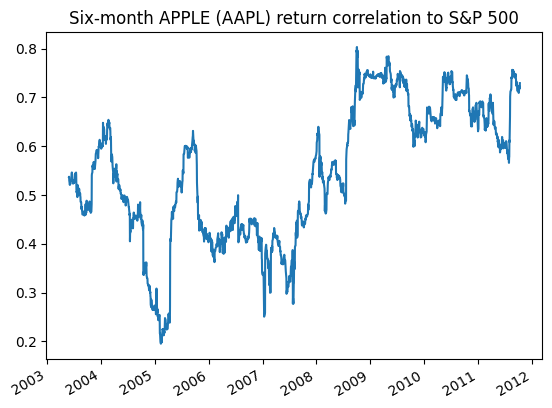

In [ ]:
# Six-month AAPL return correlation to S&P 500


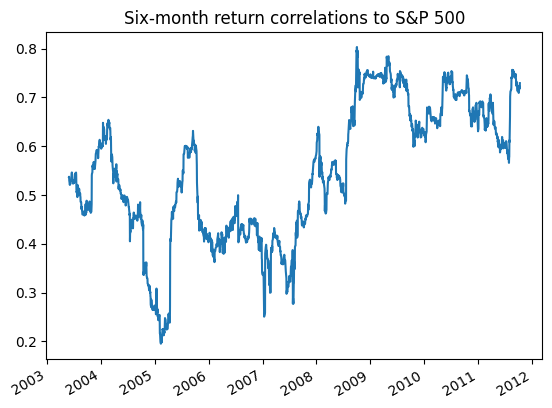

In [ ]:
# Six-month return correlations to S&P 500


#### **User-Defined Moving Window Functions**
interested with the percentile rank of a particular value over the sample

In [ ]:
# Define a custom function
from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

In [ ]:
# Extract


NameError: name 'returns' is not defined

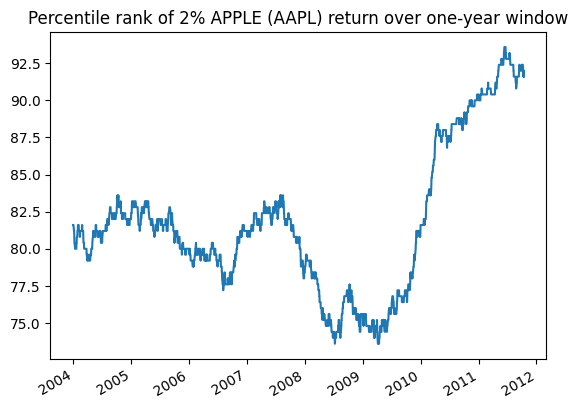

In [ ]:
#Percentile rank of 2% AAPL return over one-year window


# **See you all next week!!!**
# **Good Luck!**